# Figure 2

## Imports

In [2]:
from brian2 import *
prefs.codegen.target = 'numpy'

import itertools
import numpy as np
import scipy.stats
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import seaborn as sns
import pickle
import glob

from encoder_class.phase_encoder import PhaseEncoder, run_simulation
from encoder_class.theoretical_functions import phi_of_I_lin, phi_of_I
from encoder_class.encoder_functions import model_sigma
from encoder_class.plot_functions import plt_fig_2b

## Figure 2B

### Network Setup

In [3]:
M = 5
N = 1

model_params = {}
model_params["tau_m"] = 24*ms
model_params["R_m"] = 142e6*ohm
model_params["v_thres"] = 15*mV
model_params["v_rest"] = 0*mV
model_params["v_reset"] = 0*mV
model_params["tau_ref"] = 0*ms
model_params["v_0"] = 0*mV
model_params["noise_frac"] = 0.1

oscillation_params = {}
oscillation_params["I_osc"] = 40*pA
oscillation_params["f"] = 5*Hz

input_params = {}
input_params["automatic_range"] = True
input_params["corr_frac"] = 0.05
input_params["I_min"] = 60*pA
input_params["I_max"] = 160*pA

simulation_params = {}
simulation_params["method"] = "euler"
simulation_params["num_oscillations"] = 3
simulation_params["monitor_spikes"] = True
simulation_params["monitor_voltage"] = True
simulation_params["dt"] = 0.05*ms
simulation_params["record_dt"] = 0.5*ms

### Run Simulation

In [4]:
encoder = PhaseEncoder(num_ensembles=M, ensemble_size=N, model_params=model_params, 
                       input_params=input_params, oscillation_params=oscillation_params,
                       simulation_params=simulation_params, rnd_seed=0)

exp_phis = run_simulation(encoder, mode='experimental')

spikes = encoder.monitors["SM"]
VM = encoder.monitors["VM"]

Starting simulation at t=0. s for a duration of 0.8 s
0.8 s (100%) simulated in 1s


### Set Parameter Variables 

In [5]:
neuron = 4
partition = 100
num_oscillations = encoder.simulation_params["num_oscillations"]
runtime = encoder.simulation_params["runtime"]
I_osc = encoder.oscillation_params["I_osc"]
omega = encoder.oscillation_params["omega"]
phis = encoder.groups["encoder"].phi_0
T = encoder.oscillation_params["T"]
f = encoder.oscillation_params["f"]
start_time = phis[neuron]/(2*pi)*T
end_time = runtime - start_time
pre_t_values = np.linspace(-start_time, 0, partition)
post_t_values = np.linspace(0, runtime, partition)

## Figure 2B

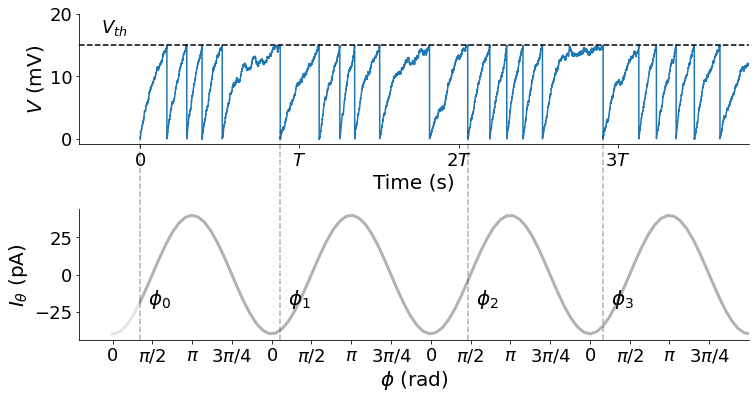

In [5]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
plt.subplots_adjust(wspace=0, hspace=0.5)

ax1.plot(VM.t, VM.v[neuron]/mV)
ax1.plot(pre_t_values, [0.005]*partition, linewidth=0)

ax2.plot(post_t_values, I_osc*np.cos(omega*post_t_values - pi + phis[neuron])/pA, color='black', linewidth=3, alpha=0.3)
ax2.plot(pre_t_values, I_osc*np.cos(omega*pre_t_values - pi + phis[neuron])/pA, color='black', linewidth=3, alpha=0.1)

for number, phi  in enumerate(exp_phis[neuron][:num_oscillations]):
    position = ((number + 1)*T - start_time + phi/omega)/second
    ax2.axvline(position, ymax=1.6, color='black', alpha=0.3, linestyle="dashed", clip_on=False)
    ax2.text(position + 0.01, -20, r"$\phi_{{{}}}$".format(number + 1), fontsize=20) 
    
plt_fig_2b(start_time, runtime, T, num_oscillations, ax1, ax2)


plt.savefig('Figures/Figure_2b.svg', dpi=600)
plt.savefig('Figures/Figure_2b.png', dpi=600)